# Bootstrap based on amplitude

For bootstrapping on the isolated sounds, a much simpler process is adequate: Separate the background from the speech based on the amplitude in each frame.

A simple amplitude threshold will separate the speech from the background well enough to bootstrap models for most sounds. However, the threshold may need to be different for each sound. In addition, the amplitudes for background and speech may overlap for the quietest speech sounds.

I am attaching a file that recommends smoothing the amplitudes of consecutive frames. I used momentum for smoothing, but any kind of smoothing should do. As you will see in the plots in the attached file, separating speech from background is much easier with the smoothed signal.

credits: https://medium.com/analytics-vidhya/speech-analytics-part-2-sound-analytics-in-torchaudio-7645a3dd192d


In [1]:
!pip3 install torchaudio
!pip install torch
!pip install webrtcvad

     |████████████████████████████████| 1.9MB 5.2MB/s 
     |████████████████████████████████| 804.1MB 20kB/s 
ERROR: torchvision 0.9.0+cu101 has requirement torch==1.8.0, but you'll have torch 1.8.1 which is incompatible.
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.8.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import os

In [4]:
base_path = '/content/gdrive/MyDrive/CMU/11785_Intro_to_Deep_Learning/DL_Group_Project/Dataset/'
folders = [
           'Marta_Recordings',
           'Mansi_Recordings/Complex',
           'Mansi_Recordings/Steady_State',
           'Sreedhar_Recordings',
           'Sreenidhi_Recordings'
]

In [5]:
folder_index = 0
wav_filename = 'AE.wav'

In [6]:
recording_path = f'{base_path}{folders[folder_index]}'

In [7]:
# load .wav file
wav_path = f'{recording_path}/{wav_filename}'
waveform, sample_rate = torchaudio.load(wav_path)
print(f"Shape of waveform: {waveform.size()}")
print(f"Sample rate of waveform: {sample_rate}")

Shape of waveform: torch.Size([2, 887195])
Sample rate of waveform: 44100


num channels: 2
num frames: 887195


KeyboardInterrupt: ignored

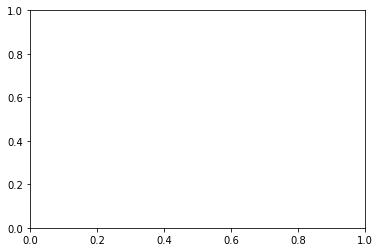

In [8]:
# split .wav into frames
waveform_np = waveform.numpy()
num_channels, num_frames = waveform_np.shape
print(f"num channels: {num_channels}")
print(f"num frames: {num_frames}")

plt.figure()
plt.plot(waveform_np)

In [ ]:
# normalize amplitude (-1, 1)
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

In [ ]:
waveform_np_norm = normalize(waveform_np)

In [ ]:
# get threshold amplitude for sound

In [ ]:
# label each frame based on amplitude

https://github.com/wiseman/py-webrtcvad

In [ ]:
import webrtcvad
vad = webrtcvad.Vad()

In [ ]:
vad.set_mode(1)

In [ ]:
# TODO: how do we know frame duration???

In [ ]:
# Run the VAD on 10 ms of silence. The result should be False.
sample_rate = 16000
frame_duration = 10  # ms
frame = b'\x00\x00' * int(sample_rate * frame_duration / 1000)
print 'Contains speech: %s' % (vad.is_speech(frame, sample_rate)

## Histogram of frame amplitude

In [ ]:
def histogram_frame_amplitude():
  pass

In [ ]:
def histogram_frame_amplitude_vs_time():
  pass

  